In [17]:
import numpy as np
import pandas as pd
import tabula as tb
import glob as g
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
texto=open('CCR_R.csv').read()

In [19]:
stopwords= set(STOPWORDS)
new_words = []
with open("stopwords.txt", 'r', encoding='utf-8') as f:
    [new_words.append(word) for line in f for word in line.split()]
new_stopwords = stopwords.union(new_words)

In [20]:
wc=WordCloud(background_color='White',stopwords=new_stopwords, min_font_size=3, width=1920, height=1080, colormap='viridis',collocation_threshold=10).generate(texto)

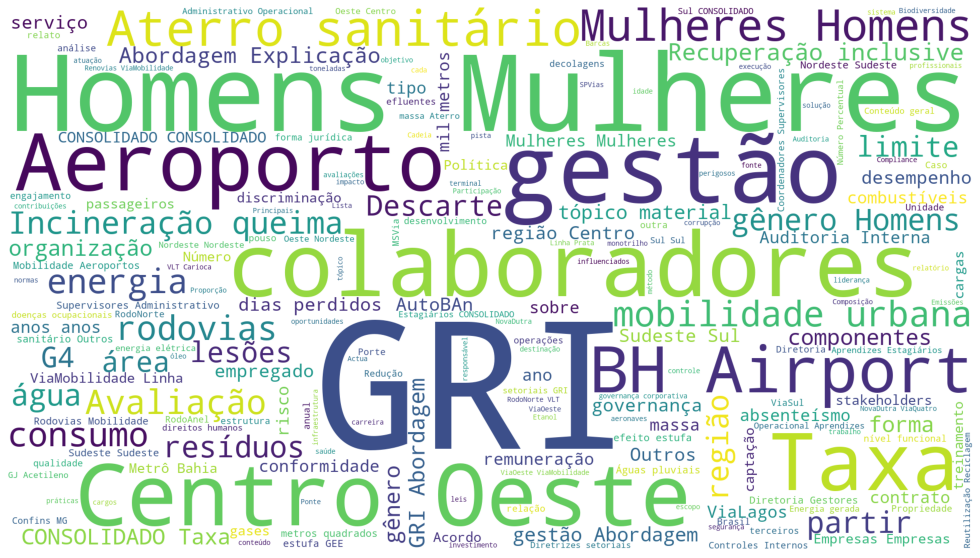

In [21]:
fig, ax= plt.subplots(figsize=(19,10))
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wc)
plt.savefig('we_CCR_2019.png')

In [22]:
ccr_palavras=wc.process_text(texto)
ccr_palavras=pd.DataFrame.from_dict(ccr_palavras, orient='index')
ccr_palavras.sort_values(ascending=False, by=0,inplace=True)
ccr_palavras.reset_index(inplace=True)
ccr_palavras.columns=('nomes','valores')
ccr_palavras

,nomes,valores
0,Homens Mulheres,22
1,GRI,22
2,gestão,17
3,colaboradores,15
4,Centro Oeste,14
...,...,...
694,Acreditação Conquista,1
695,Negócios ViaRio,1
696,homologação Negócios,1
697,tratado,1


In [23]:
x=ccr_palavras["nomes"][:20]
y=ccr_palavras['valores'][:20]
fig= px.bar(x=x, y=y,text=y,)
fig.update_layout()
fig.show()